In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
titanic = pd.read_csv("C:/Users/jycha/Downloads/AI-class-main/AI-class-main/titanic.csv", index_col = 0)

In [91]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [92]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [94]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [95]:
titanic = titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [96]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [97]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


In [99]:
#Splitting the data into training and test test
X = titanic.iloc[:,1:7].values
y = titanic.iloc[:,0].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [100]:
X

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

In [101]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [102]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(6,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               700       
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dense_14 (Dense)            (None, 60)                4860      
                                                                 
 dense_15 (Dense)            (None, 2)                 122       
                                                                 
Total params: 13,762
Trainable params: 13,762
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [103]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 5.2299 - accuracy: 0.5478 - val_loss: 0.6480 - val_accuracy: 0.6480
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.6601 - val_loss: 0.6031 - val_accuracy: 0.7430
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6231 - accuracy: 0.6194 - val_loss: 0.5646 - val_accuracy: 0.7318
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.6840 - val_loss: 0.5755 - val_accuracy: 0.7263
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.6952 - val_loss: 0.5170 - val_accuracy: 0.7542
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7261 - val_loss: 0.4876 - val_accuracy: 0.7542
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5209 - accuracy: 0.7598 - val_loss: 0.4479 - val_accuracy: 0.8156
Epoch 8/100


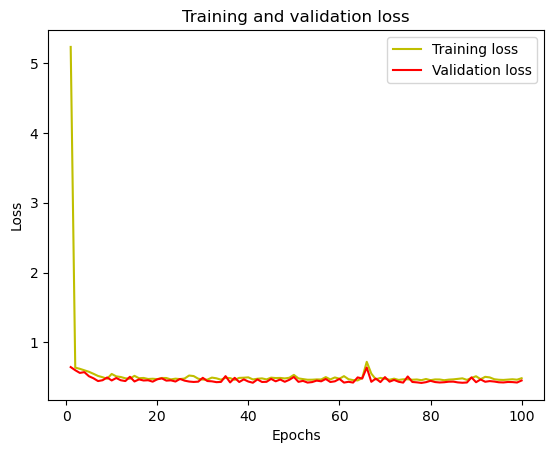

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

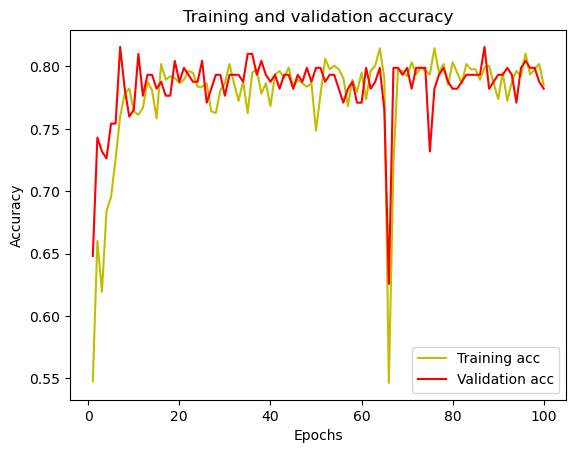

In [105]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [106]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[91 19]
 [20 49]]
